# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
data= pd.read_csv('/content/data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#count the number of rows and columns in the dataset
data.shape

(569, 33)

# Preprocessing

In [5]:
#count the number of emty (NaN, NAN, na) values in each column
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
#drop the column with all missing values
data= data.dropna(axis=1)

In [7]:
#get the new count of the number of rows and columns
data.shape

(569, 32)

In [8]:
#get a count of the number of Malignant (M) or Benign (B) cells
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
# look at the data types to see which columns need to be encoded
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
# encode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
labelencoder_Y.fit_transform(data.iloc[:,1].values)

data.iloc[:,1].values

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [11]:
# encode the categorical data values
# encode 1 for Malignant (M) and 0 for Benign (B)
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
data.iloc[:,1]=labelencoder_Y.fit_transform(data.iloc[:,1].values)

data.iloc[:,1]

<ipython-input-11-8389530f7657>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,1]=labelencoder_Y.fit_transform(data.iloc[:,1].values)


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [12]:
import warnings
warnings.filterwarnings('ignore')

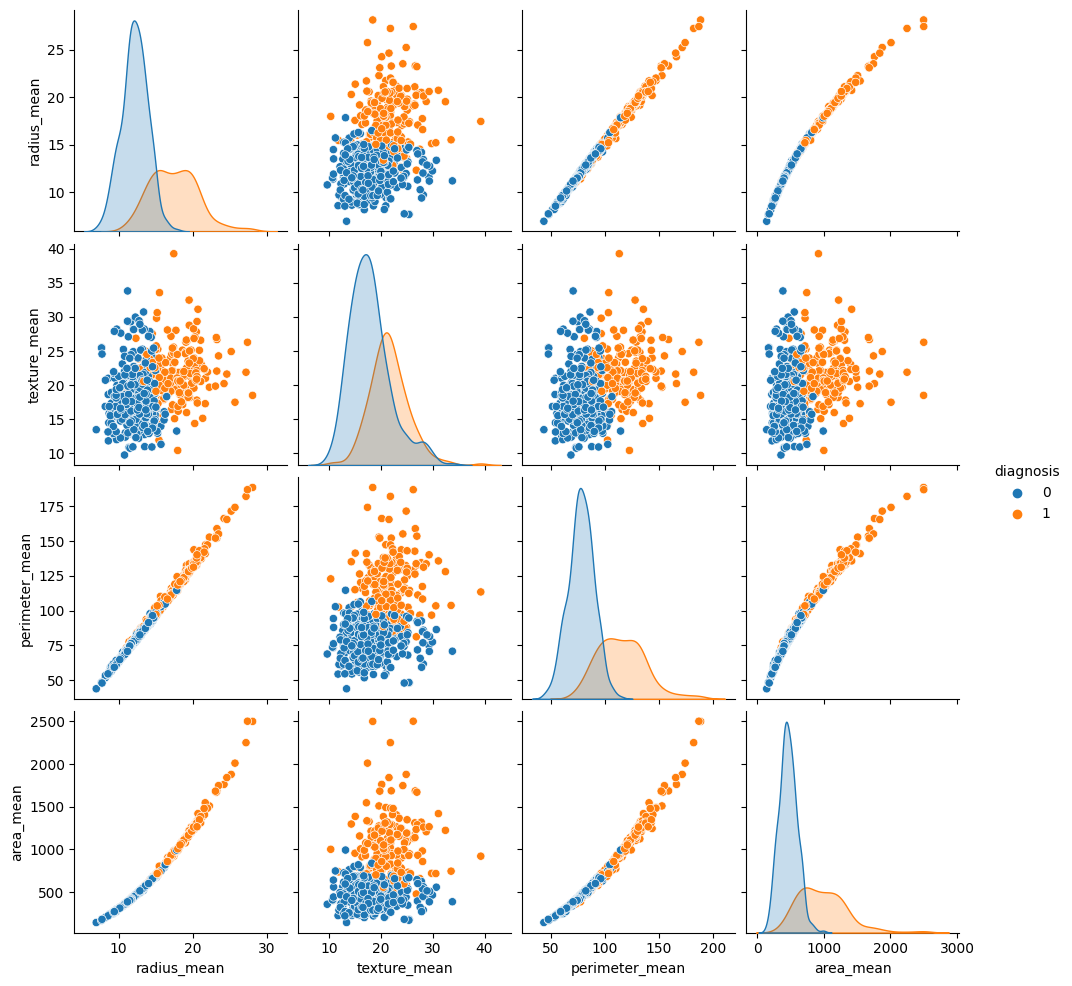

In [13]:
# create a pair plot
sns.pairplot(data.iloc[:,1:6], hue='diagnosis')

In [14]:
# get the correlation of the columns
data.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


<Axes: >

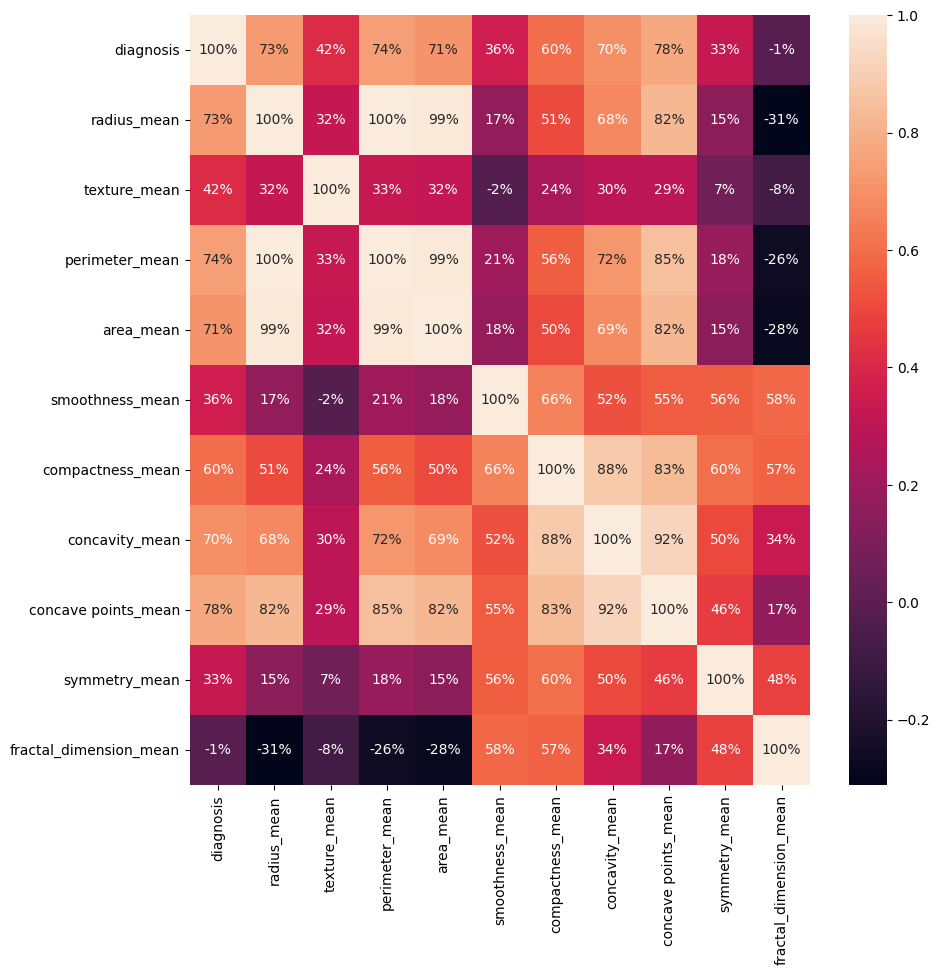

In [15]:
# visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(data.iloc[:,1:12].corr(), annot=True, fmt='.0%')

In [16]:
# split the dataset into independent (X) and dependent (Y) datasets
X=data.iloc[:,2:31].values
Y=data.iloc[:,1].values

In [17]:
# split the data into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.25, random_state=0)

In [18]:
# scale the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [47]:
# create a function for the models
def models(X_train, Y_train):

    # Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)

    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(X_train, Y_train)

    # Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, Y_train)

    # Print the models accuracy on the training data
    print('[0] Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1] Decision Tree Training Accuracy:', tree.score(X_train, Y_train))
    print('[2] Random Forest Training Accuracy:', forest.score(X_train, Y_train))

    # Return the trained models
    return [log, tree, forest]

# Get all of the models
models_list = models(X_train, Y_train)

# Test model accuracy on test data using confusion matrix
from sklearn.metrics import confusion_matrix
for i in range(len(models_list)):
    print('Model ', i)
    cm = confusion_matrix(Y_test, models_list[i].predict(X_test))
    TP = cm[0][0]
    TN = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
    print(cm)
    print('Testing Accuracy= ', (TP + TN) / (TP + TN + FN + FP))
    print()


[0] Logistic Regression Training Accuracy: 0.9906103286384976
[1] Decision Tree Training Accuracy: 1.0
[2] Random Forest Training Accuracy: 0.9953051643192489
Model  0
[[86  4]
 [ 3 50]]
Testing Accuracy=  0.951048951048951

Model  1
[[83  7]
 [ 2 51]]
Testing Accuracy=  0.9370629370629371

Model  2
[[87  3]
 [ 2 51]]
Testing Accuracy=  0.965034965034965



In [48]:
# show another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(models_list)):
    print('Model ', i)
    print(classification_report(Y_test, models_list[i].predict(X_test)))
    print(accuracy_score(Y_test, models_list[i].predict(X_test)))
    print()

Model  0
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951

Model  1
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        90
           1       0.88      0.96      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

0.9370629370629371

Model  2
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted